# 🚀 Stage 5: Practice Projects

## 🎯 Objective
Apply NumPy skills to real-world projects and challenges

---

## Table of Contents
1. Image Processing
2. Statistical Analysis
3. Simple Linear Regression
4. Matrix Calculator
5. Data Preprocessing Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Project 1: Image Processing

### Task: Create and manipulate synthetic images using NumPy

Image shape: (100, 100)
Pixel values range: 0.0 to 255.0


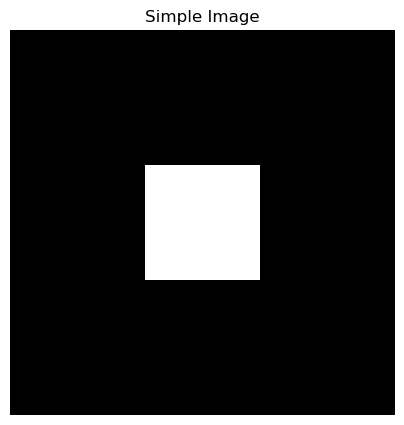

In [2]:
# Create a simple image (grayscale)
height, width = 100, 100
image = np.zeros((height, width))

# Add a white square in the center
center_x, center_y = 50, 50
size = 30
image[center_y-size//2:center_y+size//2, 
      center_x-size//2:center_x+size//2] = 255

print("Image shape:", image.shape)
print(f"Pixel values range: {image.min()} to {image.max()}")

# Display (if matplotlib is available)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Simple Image')
plt.axis('off')
plt.show()

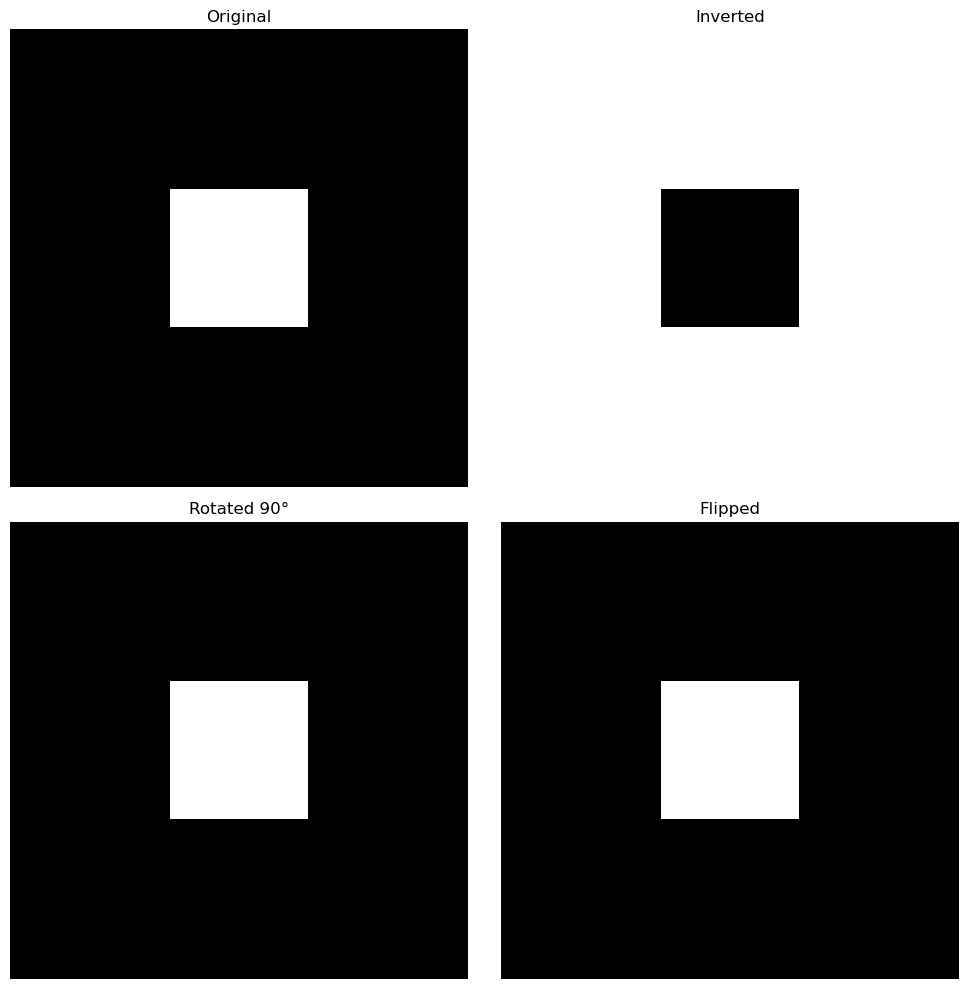

In [3]:
# Image transformations

# 1. Invert image
inverted = 255 - image

# 2. Rotate 90 degrees
rotated = np.rot90(image)

# 3. Flip horizontally
flipped = np.fliplr(image)

# Display all
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 1].imshow(inverted, cmap='gray')
axes[0, 1].set_title('Inverted')
axes[1, 0].imshow(rotated, cmap='gray')
axes[1, 0].set_title('Rotated 90°')
axes[1, 1].imshow(flipped, cmap='gray')
axes[1, 1].set_title('Flipped')

for ax in axes.flat:
    ax.axis('off')
    
plt.tight_layout()
plt.show()

---

## Project 2: Statistical Analysis

### Task: Analyze student performance data

In [4]:
# Generate synthetic student data
np.random.seed(42)
n_students = 100

# Scores for 5 subjects
scores = np.random.normal(loc=75, scale=10, size=(n_students, 5))
scores = np.clip(scores, 0, 100)  # Ensure 0-100 range

subjects = ['Math', 'Physics', 'Chemistry', 'Biology', 'English']

print("Student Scores Dataset")
print(f"Shape: {scores.shape}")
print(f"\nFirst 5 students:\n{scores[:5].round(2)}")

Student Scores Dataset
Shape: (100, 5)

First 5 students:
[[79.97 73.62 81.48 90.23 72.66]
 [72.66 90.79 82.67 70.31 80.43]
 [70.37 70.34 77.42 55.87 57.75]
 [69.38 64.87 78.14 65.92 60.88]
 [89.66 72.74 75.68 60.75 69.56]]


In [5]:
# Statistical analysis per subject
print("=" * 60)
print("SUBJECT-WISE STATISTICS")
print("=" * 60)

for i, subject in enumerate(subjects):
    subject_scores = scores[:, i]
    
    print(f"\n{subject}:")
    print(f"  Mean: {np.mean(subject_scores):.2f}")
    print(f"  Median: {np.median(subject_scores):.2f}")
    print(f"  Std Dev: {np.std(subject_scores):.2f}")
    print(f"  Min: {np.min(subject_scores):.2f}")
    print(f"  Max: {np.max(subject_scores):.2f}")
    print(f"  Range: {np.max(subject_scores) - np.min(subject_scores):.2f}")

SUBJECT-WISE STATISTICS

Math:
  Mean: 74.55
  Median: 74.90
  Std Dev: 8.96
  Min: 55.48
  Max: 98.15
  Range: 42.67

Physics:
  Mean: 75.77
  Median: 75.66
  Std Dev: 9.79
  Min: 51.98
  Max: 93.86
  Range: 41.88

Chemistry:
  Mean: 74.06
  Median: 74.75
  Std Dev: 9.79
  Min: 42.59
  Max: 96.22
  Range: 53.63

Biology:
  Mean: 76.22
  Median: 76.52
  Std Dev: 9.38
  Min: 55.87
  Max: 100.00
  Range: 44.13

English:
  Mean: 74.52
  Median: 73.54
  Std Dev: 10.20
  Min: 48.80
  Max: 100.00
  Range: 51.20


In [6]:
# Student-wise analysis
total_scores = np.sum(scores, axis=1)
avg_scores = np.mean(scores, axis=1)

# Find top 5 students
top_5_idx = np.argsort(total_scores)[-5:][::-1]

print("\n" + "=" * 60)
print("TOP 5 STUDENTS")
print("=" * 60)

for rank, idx in enumerate(top_5_idx, 1):
    print(f"\nRank {rank}: Student {idx+1}")
    print(f"  Total: {total_scores[idx]:.2f}")
    print(f"  Average: {avg_scores[idx]:.2f}")
    print(f"  Scores: {scores[idx].round(2)}")


TOP 5 STUDENTS

Rank 1: Student 85
  Total: 426.84
  Average: 85.37
  Scores: [95.61 92.55 72.51 84.72 81.45]

Rank 2: Student 75
  Total: 425.86
  Average: 85.17
  Scores: [75.25 79.98 89.51 84.59 96.53]

Rank 3: Student 36
  Total: 420.29
  Average: 84.06
  Scores: [ 83.27  75.13  89.54  72.35 100.  ]

Rank 4: Student 96
  Total: 417.58
  Average: 83.52
  Scores: [ 72.51  80.77  78.11 100.    86.2 ]

Rank 5: Student 63
  Total: 413.26
  Average: 82.65
  Scores: [72.82 85.99 83.25 83.14 88.05]


In [7]:
# Grade distribution
avg_scores = np.mean(scores, axis=1)

grade_a = np.sum(avg_scores >= 90)
grade_b = np.sum((avg_scores >= 80) & (avg_scores < 90))
grade_c = np.sum((avg_scores >= 70) & (avg_scores < 80))
grade_d = np.sum((avg_scores >= 60) & (avg_scores < 70))
grade_f = np.sum(avg_scores < 60)

print("\n" + "=" * 60)
print("GRADE DISTRIBUTION")
print("=" * 60)
print(f"Grade A (90-100): {grade_a} students ({grade_a/n_students*100:.1f}%)")
print(f"Grade B (80-89):  {grade_b} students ({grade_b/n_students*100:.1f}%)")
print(f"Grade C (70-79):  {grade_c} students ({grade_c/n_students*100:.1f}%)")
print(f"Grade D (60-69):  {grade_d} students ({grade_d/n_students*100:.1f}%)")
print(f"Grade F (<60):    {grade_f} students ({grade_f/n_students*100:.1f}%)")


GRADE DISTRIBUTION
Grade A (90-100): 0 students (0.0%)
Grade B (80-89):  11 students (11.0%)
Grade C (70-79):  76 students (76.0%)
Grade D (60-69):  13 students (13.0%)
Grade F (<60):    0 students (0.0%)


---

## Project 3: Simple Linear Regression

### Task: Implement linear regression from scratch using NumPy

Dataset: 50 points
X range: 0.00 to 10.00
y range: 3.13 to 24.30


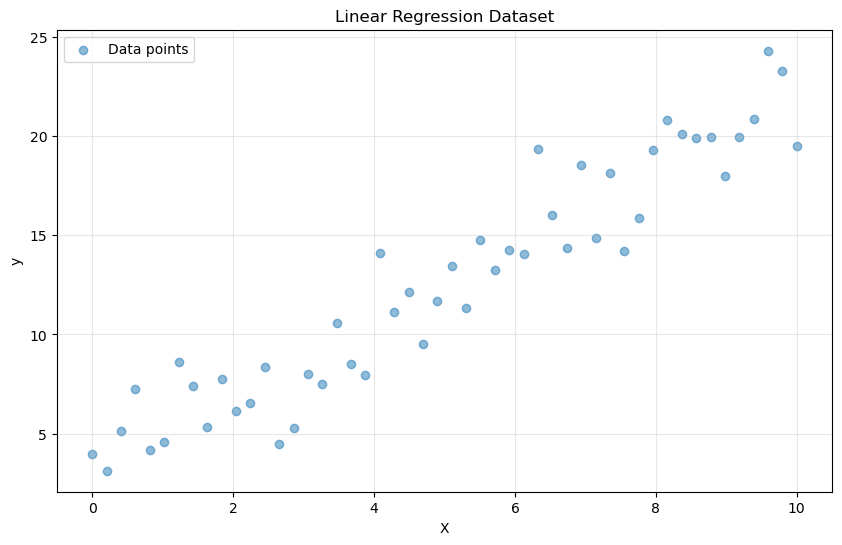

In [8]:
# Generate sample data: y = 2x + 3 + noise
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 3 + np.random.randn(50) * 2

print(f"Dataset: {len(X)} points")
print(f"X range: {X.min():.2f} to {X.max():.2f}")
print(f"y range: {y.min():.2f} to {y.max():.2f}")

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Implement linear regression
# Formula: y = mx + c
# m = (n*Σxy - Σx*Σy) / (n*Σx² - (Σx)²)
# c = (Σy - m*Σx) / n

n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x2 = np.sum(X ** 2)

# Calculate slope (m) and intercept (c)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
c = (sum_y - m * sum_x) / n

print("Linear Regression Results:")
print(f"Slope (m): {m:.4f}")
print(f"Intercept (c): {c:.4f}")
print(f"\nEquation: y = {m:.4f}x + {c:.4f}")
print(f"\nTrue equation: y = 2.0000x + 3.0000")

Linear Regression Results:
Slope (m): 1.8840
Intercept (c): 3.1289

Equation: y = 1.8840x + 3.1289

True equation: y = 2.0000x + 3.0000



Model Performance:
R² Score: 0.9032
RMSE: 1.8167


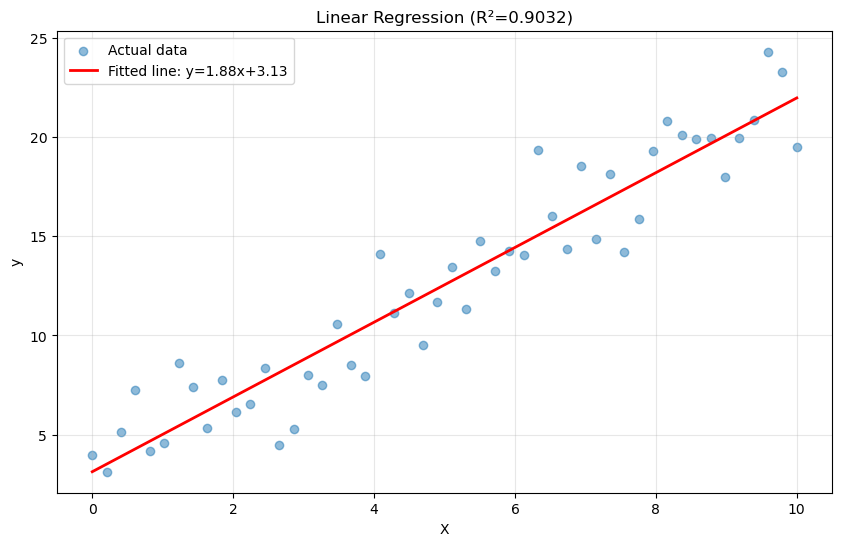

In [10]:
# Make predictions
y_pred = m * X + c

# Calculate R² score
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print(f"\nModel Performance:")
print(f"R² Score: {r2_score:.4f}")
print(f"RMSE: {np.sqrt(np.mean((y - y_pred)**2)):.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual data')
plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Fitted line: y={m:.2f}x+{c:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Regression (R²={r2_score:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## Project 4: Matrix Calculator

### Task: Build a comprehensive matrix calculator

In [18]:
class MatrixCalculator:
    """A calculator for matrix operations using NumPy"""
    
    def __init__(self, matrix):
        self.matrix = np.array(matrix)
        
    def info(self):
        """Display matrix information"""
        print("Matrix:")
        print(self.matrix)
        print(f"\nShape: {self.matrix.shape}")
        print(f"Size: {self.matrix.size}")
        print(f"Dtype: {self.matrix.dtype}")
        
    def transpose(self):
        """Return transpose"""
        return self.matrix.T
    
    def determinant(self):
        """Calculate determinant"""
        if self.matrix.shape[0] != self.matrix.shape[1]:
            return "Matrix must be square!"
        return np.linalg.det(self.matrix)
    
    def inverse(self):
        """Calculate inverse"""
        if self.matrix.shape[0] != self.matrix.shape[1]:
            return "Matrix must be square!"
        try:
            return np.linalg.inv(self.matrix)
        except:
            return "Matrix is singular (not invertible)"
    
    def eigenvalues(self):
        """Calculate eigenvalues"""
        if self.matrix.shape[0] != self.matrix.shape[1]:
            return "Matrix must be square!"
        return np.linalg.eig(self.matrix)[0]
    
    def multiply(self, other):
        """Matrix multiplication"""
        return self.matrix @ other

In [17]:
# Test the calculator
A = [[4, 7],
     [2, 6]]

calc = MatrixCalculator(A)

print("=" * 50)
calc.info()

print("\n" + "=" * 50)
print("Transpose:")
print(calc.transpose())

print("\n" + "=" * 50)
print(f"Determinant: {calc.determinant():.4f}")

print("\n" + "=" * 50)
print("Inverse:")
print(calc.inverse())

print("\n" + "=" * 50)
print("Eigenvalues:")
print(calc.eigenvalues())

Matrix:
[[4 7]
 [2 6]]

Shape: (2, 2)
Size: 4
Dtype: int64

Transpose:
[[4 2]
 [7 6]]

Determinant: 10.0000

Inverse:
[[ 0.6 -0.7]
 [-0.2  0.4]]

Eigenvalues:
[1.12701665 8.87298335]


---

## Project 5: Data Preprocessing Pipeline

### Task: Build a complete preprocessing pipeline

In [20]:
# Generate sample dataset with issues
np.random.seed(42)
n_samples = 100

# Create data with different scales and missing values
age = np.random.randint(18, 65, n_samples)
salary = np.random.randint(30000, 120000, n_samples)
experience = np.random.randint(0, 30, n_samples)

# Introduce missing values
age[np.random.choice(n_samples, 10, replace=False)] = np.nan
salary[np.random.choice(n_samples, 10, replace=False)] = np.nan

# Combine into dataset
data = np.column_stack([age, salary, experience])

print("Raw Dataset:")
print(f"Shape: {data.shape}")
print(f"\nFirst 10 rows:\n{data[:10]}")
print(f"\nMissing values per column: {np.sum(np.isnan(data), axis=0)}")

ValueError: cannot convert float NaN to integer

In [21]:
# Preprocessing Pipeline
print("=" * 60)
print("DATA PREPROCESSING PIPELINE")
print("=" * 60)

# Step 1: Handle missing values (fill with median)
print("\nStep 1: Handling missing values...")
for i in range(data.shape[1]):
    median_val = np.nanmedian(data[:, i])
    data[np.isnan(data[:, i]), i] = median_val
    print(f"  Column {i}: Filled {np.sum(np.isnan(data[:, i]))} missing values with median {median_val:.2f}")

# Step 2: Remove outliers (values beyond 3 std deviations)
print("\nStep 2: Removing outliers...")
original_size = len(data)
for i in range(data.shape[1]):
    mean = np.mean(data[:, i])
    std = np.std(data[:, i])
    outliers = np.abs(data[:, i] - mean) > 3 * std
    print(f"  Column {i}: Found {np.sum(outliers)} outliers")
    
# Keep only rows without outliers in any column
mask = np.all(np.abs(data - np.mean(data, axis=0)) <= 3 * np.std(data, axis=0), axis=1)
data = data[mask]
print(f"  Removed {original_size - len(data)} rows total")

# Step 3: Normalize features (0-1 scaling)
print("\nStep 3: Normalizing features (0-1 range)...")
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)
data_normalized = (data - min_vals) / (max_vals - min_vals)
print("  Normalization complete")

# Step 4: Standardize features (mean=0, std=1)
print("\nStep 4: Standardizing features (mean=0, std=1)...")
mean_vals = np.mean(data, axis=0)
std_vals = np.std(data, axis=0)
data_standardized = (data - mean_vals) / std_vals
print("  Standardization complete")

print("\n" + "=" * 60)
print("PREPROCESSING COMPLETE")
print("=" * 60)

DATA PREPROCESSING PIPELINE

Step 1: Handling missing values...


NameError: name 'data' is not defined

In [22]:
# Compare original vs preprocessed
print("\nORIGINAL DATA STATISTICS:")
print(f"Shape: {data.shape}")
print(f"Mean per column: {np.mean(data, axis=0).round(2)}")
print(f"Std per column: {np.std(data, axis=0).round(2)}")

print("\nNORMALIZED DATA (0-1):")
print(f"Min per column: {np.min(data_normalized, axis=0).round(4)}")
print(f"Max per column: {np.max(data_normalized, axis=0).round(4)}")

print("\nSTANDARDIZED DATA:")
print(f"Mean per column: {np.mean(data_standardized, axis=0).round(10)}")
print(f"Std per column: {np.std(data_standardized, axis=0).round(4)}")


ORIGINAL DATA STATISTICS:


NameError: name 'data' is not defined

---

## 🎓 Project Summary

### What You've Built:

1. **Image Processing** ✅
   - Created and manipulated images
   - Applied transformations
   
2. **Statistical Analysis** ✅
   - Analyzed student performance
   - Generated insights from data
   
3. **Linear Regression** ✅
   - Implemented from scratch
   - Evaluated model performance
   
4. **Matrix Calculator** ✅
   - Built reusable class
   - Implemented linear algebra operations
   
5. **Data Preprocessing** ✅
   - Created complete pipeline
   - Handled real-world data issues

---

## 🚀 Next Steps

1. **Build More Projects**
   - Time series analysis
   - Recommender systems
   - Neural networks from scratch

2. **Explore Libraries**
   - Pandas for data analysis
   - Scikit-learn for ML
   - TensorFlow/PyTorch for deep learning

3. **Practice Daily**
   - Solve coding challenges
   - Work with real datasets
   - Contribute to open source

**Keep building! You're ready for real-world NumPy applications! 🎉**